<a href="https://colab.research.google.com/github/jchen8000/DemystifyingLLMs/blob/main/2_Pytorch_Basics_Math_Fundamentals/PyTorch_Basices_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Pytorch Basics and Math Fundamentals (Part 3)

*   2.9. Neural Network
*   2.10	Bigram and N-gram Models
*   2.11	Greedy, Random Sampling and Beam





In [ ]:
%pip install -q \
  numpy==2.0.2 \
  matplotlib==3.10.0 \
  scikit-learn==1.6.1 \
  torch==2.9.0 \
  torchdata==0.11.0 \
  transformers==4.57.3 \
  portalocker==3.2.0

## 2.9	Neural Network

In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Read data
data = datasets.load_diabetes()
X, y = data.data, data.target

# Standardizing data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


torch.Size([353, 10]) torch.Size([353, 1])
torch.Size([89, 10]) torch.Size([89, 1])


In [24]:
class LinearRegression(nn.Module):

  def __init__(self, input_dim: int, output_dim: int) -> None:
    super(LinearRegression, self).__init__()
    self.fc1 = nn.Linear(input_dim, 32)
    self.fc2 = nn.Linear(32, 16)
    self.fc3 = nn.Linear(16, output_dim)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = LinearRegression(X_train.shape[1], y_train.shape[1])
model.to(device)

total_parameter = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {total_parameter:,}")
print(model)

Total Parameters: 897
LinearRegression(
  (fc1): Linear(in_features=10, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [25]:
learning_rate = 1e-3
epochs = 500  # number of epochs to run
batch_size = 64  # size of each batch

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Hold the best model
best_mse = np.inf   # init to infinity
history = []

In [ ]:
start_time = time.time()

for epoch in range(epochs):
    # ---- Train ----
    model.train()
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

    # ---- Evaluate ----
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = loss_fn(y_pred, y_test)
        mse_value = mse.item()  # <-- safe conversion

    history.append(mse_value)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss {mse_value:.8f}, time elapsed {(time.time()-start_time):.4f}s")

    if mse_value < best_mse:
        best_mse = mse_value

end_time = time.time()
print(f"Time spent: {(end_time-start_time):.8f}s")
print(f"Best MSE: {best_mse:.8f}")

Epoch 0: Loss 28360.67773438, time elapsed 0.0134s
Epoch 10: Loss 28030.70898438, time elapsed 0.1019s
Epoch 20: Loss 26578.67968750, time elapsed 0.1996s
Epoch 30: Loss 22370.58203125, time elapsed 0.2912s
Epoch 40: Loss 15333.47460938, time elapsed 0.3781s
Epoch 50: Loss 9548.17578125, time elapsed 0.4682s
Epoch 60: Loss 7442.72753906, time elapsed 0.5990s
Epoch 70: Loss 6501.94091797, time elapsed 0.7111s
Epoch 80: Loss 5875.80859375, time elapsed 0.8693s
Epoch 90: Loss 5427.30468750, time elapsed 1.0954s
Epoch 100: Loss 5095.76269531, time elapsed 1.3166s
Epoch 110: Loss 4838.29345703, time elapsed 1.4834s
Epoch 120: Loss 4632.90625000, time elapsed 1.6477s
Epoch 130: Loss 4479.14404297, time elapsed 1.7814s
Epoch 140: Loss 4362.22119141, time elapsed 1.9065s
Epoch 150: Loss 4277.31689453, time elapsed 2.0310s
Epoch 160: Loss 4226.60449219, time elapsed 2.1534s
Epoch 170: Loss 4184.08349609, time elapsed 2.2389s
Epoch 180: Loss 4156.26855469, time elapsed 2.3226s
Epoch 190: Loss 41

MSE: 4100.86
RMSE: 64.04


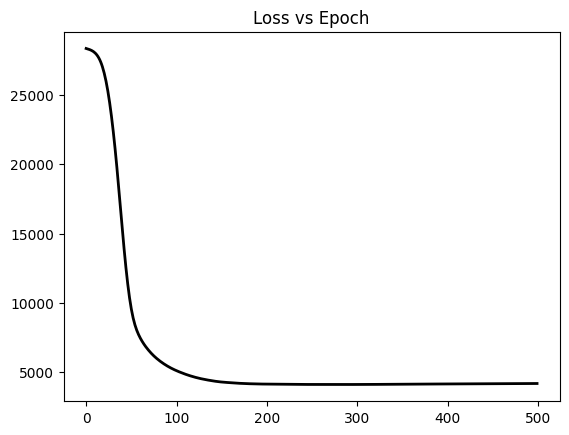

In [27]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.title('Loss vs Epoch')
plt.plot(history, lw=2, c='k')
plt.savefig("logistic_regression_training_result.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

## 2.10	Bigram and N-gram Models

### Loading and preparing text data

We use the Stanford Large Movie Review Dataset (aclImdb v1.0) for this example, the dataset is downloaded from Stanford AI Lab website at http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz.

If at the time when you run this code, the dataset is not available at the above link, you can search for the Large Movie Review Dataset, and update the ```URL``` below.

In [ ]:
import os
import tarfile
import urllib.request
import pathlib
import re

# Download & Extract the dataset
URL = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
cache_dir = os.path.expanduser("~/.cache/imdb")
tgz_path = os.path.join(cache_dir, "aclImdb_v1.tar.gz")
root_dir = os.path.join(cache_dir, "aclImdb")
os.makedirs(cache_dir, exist_ok=True)

# Download & Extract the dataset
if not os.path.exists(tgz_path):
    print("Downloading IMDB dataset...")
    urllib.request.urlretrieve(URL, tgz_path)

if not os.path.exists(root_dir):
    print("Extracting IMDB dataset...")
    with tarfile.open(tgz_path, "r:gz") as tf:
        tf.extractall(cache_dir, filter="data")

### Iterate and tokenize the data

In [ ]:
def iter_imdb_train():
    for label, subfolder in [(1, "pos"), (0, "neg")]:
        folder = pathlib.Path(root_dir) / "train" / subfolder
        for file_path in folder.glob("*.txt"):
            text = file_path.read_text(encoding="utf-8", errors="ignore")
            yield label, text

def tokenize(text):
    text = re.sub(r'\s+', ' ', text)              # collapse spaces
    text = re.sub(r'<[^>]*>', '', text)           # remove HTML tags
    text = '<SOS> ' + text.replace('.', ' .')     # add SOS and separate dots
    return text.split()

words = []
for _, text in iter_imdb_train():
    words.extend(tokenize(text))

print("Total words:", len(words))
print("Sample:", words[:50])

### Create a dictionary to record what words are following a given word

In [31]:
import random
bgrams = {}                       # dictionary to store word counts

# words = text.split()
for i in range(len(words)-2):
  w1 = words[i]                   # first word
  w2 = words[i+1]                 # second word
  if not w1 in bgrams:
    bgrams[w1] = {}
  if not w2 in bgrams[w1]:
    bgrams[w1][w2] = 1
  else:
    bgrams[w1][w2] += 1
print('Total words:', len(words))

Total words: 4602543


In [32]:
## Top 10 words after '<SOS>'
# dict(sorted(bgrams['<SOS>'].items(), key=lambda x:x[1], reverse=True)[:10])
# dict(sorted(bgrams['<SOS>'].items(), key=lambda x:-x[1])[:10])

### Sorting and calculating probabilities

In [33]:
for w in bgrams:
  bgrams[w] = dict(sorted(bgrams[w].items(), key=lambda item: -item[1])[:10])
  total = sum(bgrams[w].values())
  bgrams[w] = dict([(k, bgrams[w][k]/total) for k in bgrams[w]])

### Generating words and sentences

In [ ]:
random.seed(8888)
# this function takes a word and returns the next word.
def next_word(word):
  vars = bgrams[word]   #list of probable words for the given word
  # vars.keys() : list of possible words to choose from
  # vars.values() : list of probabilities for each possible words
  return random.choices(list(vars.keys()), weights=vars.values())[0]


def sentence(max_word=50):
  words = []
  w = '<SOS>'                 # first word is always '<SOS>'
  for i in range(max_word):         # limit max words to generate
    w = next_word(w)
    if w == '.':              # stop generating words by '.'
      break
    words.append(w)
  # return (' '.join(words) + '. ').capitalize()    # join all words to a sentence and add a dot at the end,
  return (' '.join(words) + '. ')

In [35]:
for i in range(20):
  print(sentence())

This is the movie was in their lines. 
I have to a good as a movie is a movie. 
This movie was very good. 
This is a lot about it would love this movie, and I had a few things and the film that the first time. 
I would like a little bit of a good job is a film for the other films of the film. 
This isn't a film is a great in the best. 
I have a movie. 
This is a very well. 
I was a lot of this film is a great deal. 
As a good film. 
The script. 
I don't even if you are not a good and a bit. 
This movie was the first half the film was a few of it was the movie was one of the film in this movie with the movie was a film. 
This is so much of the movie is a little too bad guy with some of the movie is a lot to watch it was in this film has a lot of his life. 
I have a lot of the worst of a lot of the same way the first time on the movie. 
This film has the film with a little more than it is a film that they are just about this is not as the film for his father is the movie. 
If you don't h

## 2.11	Greedy, Random Sampling and Beam

### Greedy:

In [36]:
def greedy_search(probabilities):
    return torch.argmax(probabilities, dim=-1)

vocab = ["h", "e", "l", "o"]  # vocabulary
probabilities = torch.tensor([
    [0.4, 0.3, 0.1, 0.2],
    [0.1, 0.7, 0.2, 0.0],
    [0.1, 0.2, 0.5, 0.2],
    [0.1, 0.1, 0.6, 0.2],
    [0.2, 0.1, 0.1, 0.6]
])

output = greedy_search(probabilities)
print(output)
generated_word = "".join([vocab[i] for i in output])
print(generated_word)

tensor([0, 1, 2, 2, 3])
hello


### Random Sampling:

In [37]:
import torch.nn.functional as F

def random_sampling(logits, top_k):
    top_k_probs, _ = torch.topk(logits, top_k, dim=-1)
    kth_highest_prob = top_k_probs[:, -1].unsqueeze(-1)
    mask = logits < kth_highest_prob
    probs = logits.masked_fill(mask, float('-inf'))
    probabilities = F.softmax(probs, dim=-1)
    output = torch.multinomial(probabilities, 1).squeeze(-1)
    return output

vocab = ["h", "e", "l", "o"]  # Vocabulary
logits = torch.tensor([
    [3.0, 1.0, 0.5, 0.1],
    [0.6, 3.5, 2.5, 0.2],
    [1.0, 0.2, 3.5, 1.5],
    [0.3, 2.5, 4.1, 0.4],
    [0.3, 1.0, 0.1, 4.4]
  ])

output = random_sampling(logits, top_k=2)
print(output)
generated_word = "".join([vocab[i] for i in output])
print(generated_word)

tensor([0, 1, 2, 1, 3])
heleo


### Beam:

In [38]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [39]:
input_text = "The quick brown fox"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

attention_mask = torch.ones(input_ids.shape, dtype=torch.long)

# Generate sequences
outputs = model.generate(
  input_ids,
  max_length=50,
  num_beams=5,
  early_stopping=True,
  attention_mask=attention_mask,
  pad_token_id=tokenizer.eos_token_id
)

# Decode generated sequences
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

The quick brown foxes have been known to eat a variety of foods, including meat, fish, eggs, nuts, seeds, nuts, seeds, nuts, seeds, nuts, seeds, nuts, seeds, nuts, seeds, nuts, seeds,
